# Bivariate and multivariate distribution functions

## A note on the following graphs

The code below ensures the fonts in plots are rendered with LaTeX.
This function adjusts matplotlib settings for a uniform feel in the textbook.
Note that with `usetex=True`, fonts are rendered with LaTeX. This may result in an error if LaTeX is not installed on your system. In that case, you can set `usetex` to `False`.

In [1]:
if "setup_text_plots" not in globals():
    from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=8, usetex=False)

For each plot, `numpy` and the following packages from `matplotlib` and `astroML`are needed to generate the graphs. The robust statistics section will require two more imports.

In [2]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.patches import Ellipse
from astroML.stats.random import bivariate_normal

## Bivariate Gaussian distributions

The generalization of the Gaussian distrubution is defined as
    
$$ p(x,y|\mu_x, \mu_y, \sigma_x,\sigma_y,\sigma_{xy}) = \frac{1}{2\pi\sigma_x\sigma_y\sqrt{(1-\rho^2)}}\text{exp}{\bigg(\frac{-z^2}{2(1-\rho^2)}\bigg)}$$

where

$$ z^2 = \frac{(x-\mu_x)^2}{\sigma_x^2}+\frac{(y-\mu_y)^2}{\sigma_y} -2\rho\frac{(x-\mu_x)(y-\mu_y)}{\sigma_x\sigma_y} $$

and the correlation coefficient between x and y is defined as 
$$ \rho = \frac{\sigma_{xy}}{\sigma_x\sigma_y} $$

For perfectly correlated variables, $\rho = \pm 1$ and for uncorrelated variables, $\rho = 0.$

The contours in the $(x,y)$ plane are ellipses centered at $x = \mu_x$ and $y=\mu_y$. The angle $\alpha$ defined for $(\pi/2 \leq \alpha \leq \pi/2)$ between the x-axis and the ellipses' major axis is given by

$$ \text{tan}(2\alpha) = 2\rho\frac{\sigma_x\sigma_y}{\sigma_x^2-\sigma_y^2} = 2\frac{\sigma_{xy}}{\sigma_x^2-\sigma_y^2}
$$

When the $(x,y)$ coordinate system is rotated by an angle $\alpha$ around the point $(x = \mu_x, y = \mu_y)$,

$$P_1 =(x−\mu_x)\:\text{cos}\:\alpha+(y−\mu_y)\:\text{sin} \:\alpha $$
$$P_2 =−(x−\mu_x)\:\text{sin} \:\alpha+(y−\mu_y)\:\text{cos} \:\alpha $$

the correlation between the two new variables P1 and P2 disappears, and the two widths are

$$\sigma_{1,2}^2 = \frac{\sigma_x^2 + \sigma_y^2}{2}\pm \sqrt{\bigg(\frac{\sigma_x^2-\sigma_y^2}{2}\bigg)^2+\sigma_{xy}^2}$$

$P_1$ and $P_2$ are the principal axes, and $\sigma_1$ and $\sigma_2$ are the minimum and maximum widths obtainable for any rotation of the coordinate axes. For a coordinate system in which the correlation vanishes, the the bivariate Gaussian is the product of two univariate Gaussians.

In the following example, we will plot a bivariate Gaussian distribution. First, we will define the mean, principal axes, and rotation of the ellipse. Note that the mean is defined as a 2D NumPy array since our Gaussian will be 2D.

In [3]:
mean = np.array([0, 0])
sigma_1 = 2
sigma_2 = 1
alpha = np.pi / 4

We then draw $10^5$ points from a multivariate normal distribution. The `bivariate_normal` function generates a covariance matrix for the given inputs, but it is otherwise similar to `numpy.random.multivariate_normal`, a more generalized version of the function.

The `bivariate_normal` function will return the 2D distribution and the 2 x 2 covariance matrix with $\sigma_x$ corresponding to the element in position $[0,0]$,$\sigma_y$ corresponding to the element in position $[1,1]$, and $\sigma_{xy}$ corresponding to the element in position $[0,1].$

In [4]:
np.random.seed(0)
x, cov = bivariate_normal(mean, sigma_1, sigma_2, alpha, size=100000,
                          return_cov=True)

sigma_x = np.sqrt(cov[0, 0])
sigma_y = np.sqrt(cov[1, 1])
sigma_xy = cov[0, 1]

print(x.shape, cov.shape)
print(sigma_x,sigma_y)

(100000, 2) (2, 2)
1.5811388300841898 1.5811388300841895


We then plot the results; we will use the `np.histogramdd` function to plot a 2D histogram. Then we will draw ellipses centered at the mean (defined as $(0,0)$ above) at an angle $\alpha = \pi /4$ with widths corresponding to $\sigma_1 \cdot N$ and heights corresponding to $\sigma_2 \cdot N$. The $N$ values are defined as 1,2, and 3.

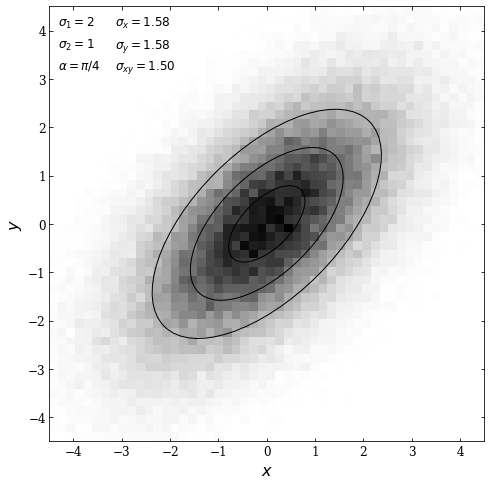

In [5]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)

# plot a 2D histogram/hess diagram of the points
H, bins = np.histogramdd(x, bins=2 * [np.linspace(-4.5, 4.5, 51)])
ax.imshow(H, origin='lower', cmap=plt.cm.binary, interpolation='nearest',
          extent=[bins[0][0], bins[0][-1], bins[1][0], bins[1][-1]])

# draw 1, 2, 3-sigma ellipses over the distribution
for N in (1, 2, 3):
    ax.add_patch(Ellipse(mean, N * sigma_1, N * sigma_2,
                         angle=alpha * 180. / np.pi, lw=1,
                         ec='k', fc='none'))

kwargs = dict(ha='left', va='top', transform=ax.transAxes)

ax.text(0.02, 0.98, r"$\sigma_1 = %i$" % sigma_1, **kwargs, fontsize = 12)
ax.text(0.02, 0.93, r"$\sigma_2 = %i$" % sigma_2, **kwargs, fontsize = 12)
ax.text(0.02, 0.88, r"$\alpha = \pi / %i$" % (np.pi / alpha), **kwargs, fontsize = 12)

ax.text(0.15, 0.98, r"$\sigma_x = %.2f$" % sigma_x, **kwargs, fontsize = 12)
ax.text(0.15, 0.93, r"$\sigma_y = %.2f$" % sigma_y, **kwargs, fontsize = 12)
ax.text(0.15, 0.88, r"$\sigma_{xy} = %.2f$" % sigma_xy, **kwargs, fontsize = 12)

ax.set_xlabel('$x$', fontsize = 16)
ax.set_ylabel('$y$', fontsize = 16)
ax.tick_params(axis='both', which='major', labelsize=12)
plt.show()


Additionally, a property of bivariate Gaussian distributions is the ability to get a univariate Gaussian distribution by marginalizing over one variable. For example, if we were to marginalize over the y variable, we would get a univariate Gaussian in $x$ with mean $\mu_x$ and standard deviation $\sigma_x$. The example below shows the result of marginalizing over both axes.

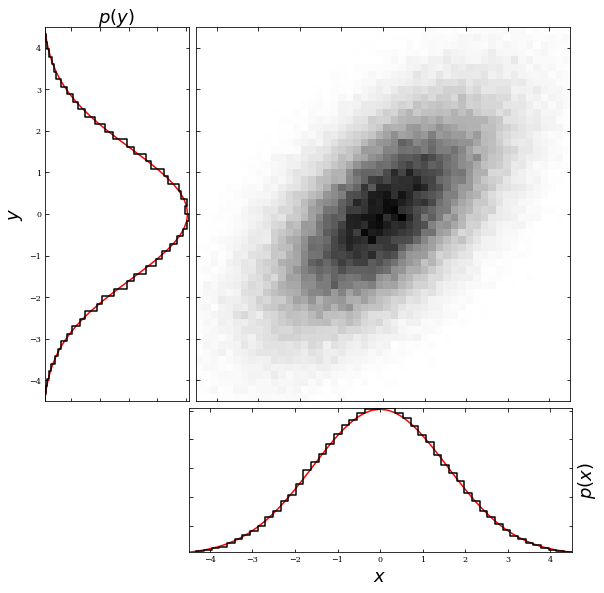

In [6]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.ticker import NullFormatter
from scipy.stats import norm

#plot figure
fig = plt.figure(figsize=(20, 10))

# define axes
ax_Pxy = plt.axes((0.2, 0.35, 0.27, 0.52))
ax_Px = plt.axes((0.2, 0.14, 0.266, 0.2))
ax_Py = plt.axes((0.1, 0.35, 0.1, 0.52))

# set axis label formatters
ax_Pxy.xaxis.set_major_formatter(NullFormatter())
ax_Pxy.yaxis.set_major_formatter(NullFormatter())

ax_Px.yaxis.set_major_formatter(NullFormatter())
ax_Py.xaxis.set_major_formatter(NullFormatter())


plt.axes(ax_Pxy)
plt.imshow(H, origin='lower', cmap=plt.cm.binary, interpolation='nearest',
          extent=[bins[0][0], bins[0][-1], bins[1][0], bins[1][-1]])

# create expected distribution with mean = 0 and sigma_x = sigma_ = 1.581 as defined above
dist = norm(0, 1.581)
x_pdf = np.linspace(-4.5, 4.5, 51)
ax_Px.plot(x_pdf, dist.pdf(x_pdf), '-r')

dist = norm(0, 1.581)
y_pdf = np.linspace(-4.5, 4.5, 51)
ax_Py.plot(dist.pdf(y_pdf),y_pdf,  '-r')

# normalize and scale marginalized data scale to gaussian 

normalized_x = H.sum(0) / (H.sum() * (bins[0][1:] - bins[0][:-1]))
normalized_y = H.sum(1) / (H.sum() * (bins[1][1:] - bins[1][:-1]))

# draw p(x) distribution
ax_Px.plot(bins[0][1:], normalized_x, '-k', drawstyle='steps')

# draw p(y) distribution
ax_Py.plot(normalized_y, bins[1][0:50], '-k', drawstyle='steps')

# label axes
ax_Px.set_xlabel('$x$', fontsize = 18)
ax_Px.set_ylabel('$p(x)$',fontsize = 18)
ax_Px.yaxis.set_label_position('right')
ax_Py.set_ylabel('$y$',fontsize = 18)
ax_Py.set_xlabel('$p(y)$', fontsize = 18)
ax_Py.xaxis.set_label_position('top')
ax_Pxy.tick_params(axis='both', which='major', labelsize=12)


## Robust estimate of bivariate Gaussian distribution from data

When working with data sets with outliers, it is sometimes better to use the median and the interquartile range to estimate variances. We can estimate $\mu$ and $\sigma$ and as $\bar{x}$ and $s$, and the distribution then becomes $(\bar{x}, \bar{y}, s_x, s_y,s_{xy}).$

The principal axes can be found with $\alpha$ estimated using:
$$ \text{tan}(2\alpha) = 2\frac{s_{xy}}{s_x^2-s_y^2}r$$

To robustly estimate r, we can use
$$\rho = \frac{V_u-V_w}{V_u+V_w}$$
where V is the variance. 

The covariance matrix with the transformed coordinates is defined as (Cov($u,w$)=0) where
<!-- \frac{\sqrt{2}}{2}\bigg( -->

$$u = \frac{\sqrt{2}}{2}\bigg(\frac{x}{\sigma_x}+\frac{y}{\sigma_y}\bigg)$$
and
$$w = \frac{\sqrt{2}}{2}\bigg(\frac{x}{\sigma_x}-\frac{y}{\sigma_y}\bigg)$$


In the following example, we will calculate three different fits on data that has outliers: the true fit, the robust fit, and the non-robust fit. Before doing so, we will need `scipy.stats` and `astroML.stats.fit_bivariate_normal`. Additionally, we will need to adjust our graphs depending on whether or not `usetex` is activated.

In [7]:
from scipy import stats
from astroML.stats import fit_bivariate_normal

# percent sign needs to be escaped if usetex is activated
import matplotlib
if matplotlib.rcParams.get('text.usetex'):
    pct = r'\%'
else:
    pct = r'%'

First we will define our parameters $N$, $\sigma_1$,$\sigma_2$, and $\alpha$. We will then draw $N$ points from a multivariate distribution, again noting that the `bivariate_normal` functions works similarly to `numpy.random.multivariate_normal` but includes the covariance matrix.

In [8]:
N = 1000
sigma1 = 2.0
sigma2 = 1.0
mu = [10, 10]
alpha_deg = 45.0
alpha = alpha_deg * np.pi / 180

np.random.seed(0)
X = bivariate_normal(mu, sigma1, sigma2, alpha, N)
np.shape(X)

(1000, 2)

Next, we will create two figures with different percentages of outliers (0.05 and 0.15). These outliers come from a bivariate Gaussian distribution with the same mean but different variance in a principal direction. To distribute the outliers, we will use the `bivariate_normal` function; afterward, we will use the `fit_bivariate_normal` function to fit parameters to our 2D distribution of points.

The `fit_bivariate_normal` function will return the mean $\mu$,$\sigma_1$, $\sigma_2$, and $\alpha$. Additionally, we can set `robust` equal to `True` or `False` depending on whether we want robust or non-robust statistics. Lastly, we will draw ellipses corresponding to the true fit, the robust fit, and the non-robust fit for both percentages of outliers.

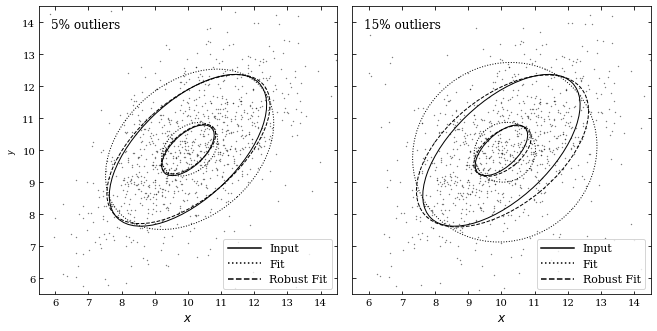

In [9]:
fig = plt.figure(figsize=(10, 5))
fig.subplots_adjust(left=0.1, right=0.95, wspace=0.05,
                    bottom=0.15, top=0.95)

for i, f in enumerate([0.05, 0.15]):
    ax = fig.add_subplot(1, 2, i + 1)

    # add outliers
    X[:int(f * N)] = bivariate_normal((10, 10), 2, 4,
                                      45 * np.pi / 180., int(f * N))
    x, y = X.T

    # compute the non-robust statistics
    (mu_nr, sigma1_nr,
     sigma2_nr, alpha_nr) = fit_bivariate_normal(x, y, robust=False)

    # compute the robust statistics
    (mu_r, sigma1_r,
     sigma2_r, alpha_r) = fit_bivariate_normal(x, y, robust=True)

    # scatter the points
    ax.scatter(x, y, s=2, lw=0, c='k', alpha=0.5)

    # Draw elipses showing the fits
    for Nsig in [1, 3]:
        # True fit
        E = Ellipse((10, 10), sigma1 * Nsig, sigma2 * Nsig, alpha_deg,
                    ec='k', fc='none')
        ax.add_patch(E)

        # Non-robust fit
        E = Ellipse(mu_nr, sigma1_nr * Nsig, sigma2_nr * Nsig,
                    (alpha_nr * 180. / np.pi),
                    ec='k', fc='none', linestyle='dotted')
        ax.add_patch(E)

        # Robust fit
        E = Ellipse(mu_r, sigma1_r * Nsig, sigma2_r * Nsig,
                    (alpha_r * 180. / np.pi),
                    ec='k', fc='none', linestyle='dashed')
        ax.add_patch(E)
        
    ax.text(0.04, 0.96, '%i%s outliers' % (f * 100, pct),
            ha='left', va='top', transform=ax.transAxes, fontsize = 12)

    ax.set_xlim(5.5, 14.5)
    ax.set_ylim(5.5, 14.5)
    ax.set_xlabel('$x$', fontsize = 12)
    ax.tick_params(axis='both', which='major', labelsize=10)

    ax.plot([0], [0], '-k', label='Input')
    ax.plot([0], [0], ':k', label='Fit')
    ax.plot([0], [0], '--k', label='Robust Fit')
    ax.legend(loc='lower right', fontsize = 11)

    if i == 0:
        ax.set_ylabel('$y$')
    else:
        ax.yaxis.set_major_formatter(plt.NullFormatter())

plt.show()

The true fit is centered at $\mu = [10, 10]$ at an angle $\alpha = \pi /4$ with width $\sigma_1 \cdot \text{Nsig}$ and height $\sigma_2 \cdot \text{Nsig}$. We can see that the robust fit comes much closer to the true fit, where as the non-robust fit does not match the data as well. We can also see that increasing the outliers corresponds to a less accurate fit.

## Multivariate Gaussian distributions

The Gaussian distribution can be extended to multivariate Gaussian distributions in an arbitrary number of dimensions. Additionally, marginalizing over one or more variables in a multivariate Gaussian distribution still produces a univariate Gaussian distribution.

Below is an example of a three-dimensional distribution. We'll first show that each of the 2D projections is a bivariate Gaussian; next, we'll demonstrate that we can marginalize over either variable of these bivariate Gaussians and still get a univariate Gaussian.

First, we define $\mu$ as a 1x3 NumPy array and the covariance matrix as a 3x3 NumPy array. Then we will define $\sigma_x$,$\sigma_y$, and $\sigma_z$, indexing along the diagonal of the covariance matrix. Following this, we'll instantiate a multivariate normal distribution by using `np.random.multivariate_normal` -- this creates the variable $mv$, which has the shape (100000,3). To get each 2D projection, we will create variables $xy$, $yz$, and $xz$.

In [10]:
mu = np.array([0,1,2])
cov = np.array([[2,-1,0],[-1,2,-1],[0,-1,2]])

sigma_x = np.sqrt(cov[0, 0])
sigma_y = np.sqrt(cov[1, 1])
sigma_z = np.sqrt(cov[2, 2])

mv = np.random.multivariate_normal(mu, cov, 100000)

xy = (mv[:,0],mv[:,1])
yz = (mv[:,1],mv[:,2])
xz = (mv[:,0],mv[:,2])

Next, we plot each 2D projection, along with the marginalization in both directions.

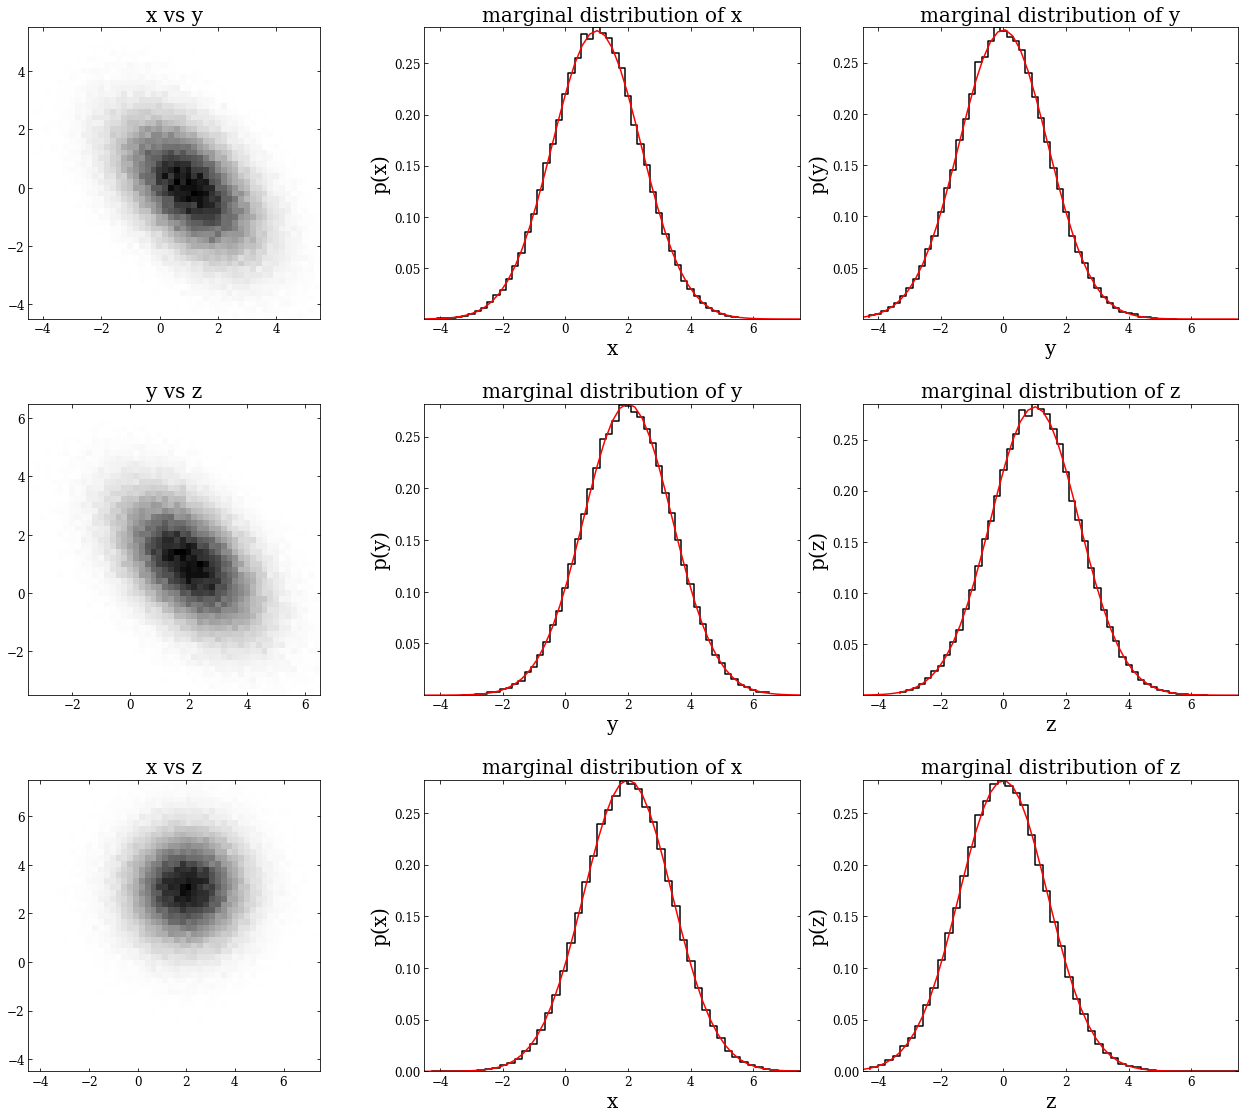

In [11]:
### create the figure

fig, ax = plt.subplots(3,3)                
fig.set_size_inches(18,15)   
fig.tight_layout(w_pad=4, h_pad=7)

### increase size of tick parameters

for i in [0,1,2]:
    for j in [0,1,2]:
        ax[i,j].tick_params(axis='both', labelsize=12)
        
### create expected normal distributions and evenly spaced values to plot against

pdf = np.linspace(-4.5, 7.5, 51)
dist0 = norm(0, sigma_x)
dist1 = norm(1, sigma_y)
dist2 = norm(2, sigma_z)

############## PLOT XY

### plot a 2D histogram/hess diagram of the points

A, bins_a = np.histogramdd(xy, bins=2 * [np.linspace(-4.5, 5.5, 51)])
ax[0,0].imshow(A,origin='lower', cmap=plt.cm.binary, interpolation='nearest',
          extent=[bins_a[0][0], bins_a[0][-1], bins_a[1][0], bins_a[1][-1]]);
ax[0,0].set_title('x vs y', fontsize = 20)

### normalize the data

normal_ax = A.sum(0) / (A.sum() * (bins_a[0][1:] - bins_a[0][:-1]))
normal_ay = A.sum(1) / (A.sum() * (bins_a[1][1:] - bins_a[1][:-1]))

### plot the normalized data and the expected distribution for marginalization over x and y

ax[0,1].plot(bins_a[0][1:], normal_ax, '-k', drawstyle='steps')
ax[0,1].plot(pdf,dist1.pdf(pdf),  '-r')
ax[0,1].set_title('marginal distribution of x', fontsize = 20)
ax[0,1].set_xlabel('x', fontsize = 20)
ax[0,1].set_ylabel('p(x)', fontsize = 20)

ax[0,2].plot(bins_a[1][1:], normal_ay, '-k', drawstyle='steps')
ax[0,2].plot(pdf,dist0.pdf(pdf),  '-r')
ax[0,2].set_title('marginal distribution of y', fontsize = 20)
ax[0,2].set_xlabel('y', fontsize = 20)
ax[0,2].set_ylabel('p(y)', fontsize = 20)

############## PLOT YZ

### plot a 2D histogram/hess diagram of the points

B, bins_b = np.histogramdd(yz, bins=2 * [np.linspace(-3.5, 6.5, 51)])
ax[1,0].imshow(B,origin='lower', cmap=plt.cm.binary, interpolation='nearest',
          extent=[bins_b[0][0], bins_b[0][-1], bins_b[1][0], bins_b[1][-1]]);
ax[1,0].set_title('y vs z', fontsize = 20)

### normalize the data

normal_bx = B.sum(0) / (B.sum() * (bins_b[0][1:] - bins_b[0][:-1]))
normal_by = B.sum(1) / (B.sum() * (bins_b[1][1:] - bins_b[1][:-1]))

### plot the normalized data and the expected distribution for marginalization over x and y

ax[1,1].plot(bins_b[0][1:], normal_bx, '-k', drawstyle='steps')
ax[1,1].plot(pdf,dist2.pdf(pdf),  '-r')
ax[1,1].set_title('marginal distribution of y', fontsize = 20)
ax[1,1].set_xlabel('y', fontsize = 20)
ax[1,1].set_ylabel('p(y)', fontsize = 20)

ax[1,2].plot(bins_b[1][1:], normal_by, '-k', drawstyle='steps')
ax[1,2].plot(pdf,dist1.pdf(pdf),  '-r')
ax[1,2].set_title('marginal distribution of z', fontsize = 20)
ax[1,2].set_xlabel('z', fontsize = 20)
ax[1,2].set_ylabel('p(z)', fontsize = 20)

############## PLOT XZ

### plot a 2D histogram/hess diagram of the points

C, bins_c = np.histogramdd(xz, bins=2 * [np.linspace(-4.5, 7.5, 51)])
ax[2,0].imshow(C,origin='upper', cmap=plt.cm.binary, interpolation='nearest',
          extent=[bins_c[0][0], bins_c[0][-1], bins_c[1][0], bins_c[1][-1]]);
ax[2,0].set_title('x vs z', fontsize = 20)

### normalize the data

normal_cx = C.sum(0) / (C.sum() * (bins_c[0][1:] - bins_c[0][:-1]))
normal_cy = C.sum(1) / (C.sum() * (bins_c[1][1:] - bins_c[1][:-1]))

### plot the normalized data and the expected distribution for marginalization over x and y

ax[2,1].plot(bins_c[0][1:], normal_cx , '-k', drawstyle='steps')
ax[2,1].plot(pdf,dist2.pdf(pdf),  '-r')
ax[2,1].set_title('marginal distribution of x', fontsize = 20)
ax[2,1].set_xlabel('x', fontsize = 20)
ax[2,1].set_ylabel('p(x)', fontsize = 20)

ax[2,2].plot(bins_c[1][1:], normal_cy, '-k', drawstyle='steps')
ax[2,2].plot(pdf,dist0.pdf(pdf),  '-r')

ax[2,2].set_title('marginal distribution of z', fontsize = 20)
ax[2,2].set_xlabel('z', fontsize = 20)
ax[2,2].set_ylabel('p(z)', fontsize = 20);